In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
import h5py
from load_data import voxelize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from io import BytesIO
from PIL import Image

def visualize_voxel(voxel_grid):
    """
    Visualizes a 3D binary voxel grid using matplotlib.

    Parameters:
    voxel_grid (numpy.ndarray): A 3D binary voxel grid where 1 indicates occupancy and 0 indicates empty.
    """

    import matplotlib.pyplot as plt
    import numpy as np
    from io import BytesIO
    from PIL import Image

    # Get the coordinates of occupied voxels
    occupied_voxels = np.argwhere(voxel_grid == 1)

    # Create a 3D plot
    fig = plt.figure()
    plt.tight_layout()

    ax = fig.add_subplot(111, projection='3d')

    # Plot occupied voxels as scatter points
    ax.scatter(occupied_voxels[:, 0], occupied_voxels[:, 2], occupied_voxels[:, 1])

    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Add grid lines
    ax.grid(True)

    # Set the aspect ratio to be equal
    ax.set_box_aspect([1, 1, 1])

    # Set the limits for the axes
    ax.set_xlim([0, voxel_grid.shape[0]])
    ax.set_ylim([0, voxel_grid.shape[1]])
    ax.set_zlim([0, voxel_grid.shape[2]])

    # Adjust axis visibility and ticks
    ax.axis("on")  # Enable axes visibility
    ax.tick_params(axis='both', which='major', labelsize=10)

    # Save to buffer
    buf = BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)  # Move the buffer cursor to the beginning
    plt.close()

    # Convert the buffer into a Pillow Image
    img = Image.open(buf)
    return img

In [2]:
# load the preprocessed voxel data.
voxels = np.load("./data/hdf5_data/airplane_voxels_test.npy")
# voxels = np.load("./generated_samples/chair_samples.npy")
# voxels = np.load("./samples/chair_epoch_9.npy")
print(voxels.shape)
# print(voxels)

(341, 128, 128, 128)


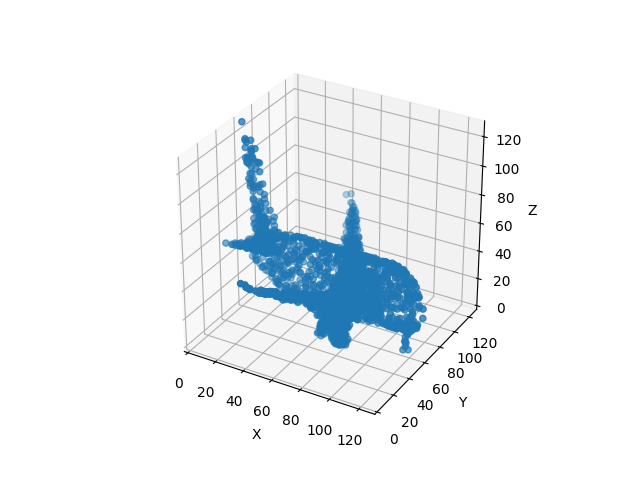

In [3]:
img = visualize_voxel(voxels[0])
display(img)

torch.Size([1, 128, 128, 128])


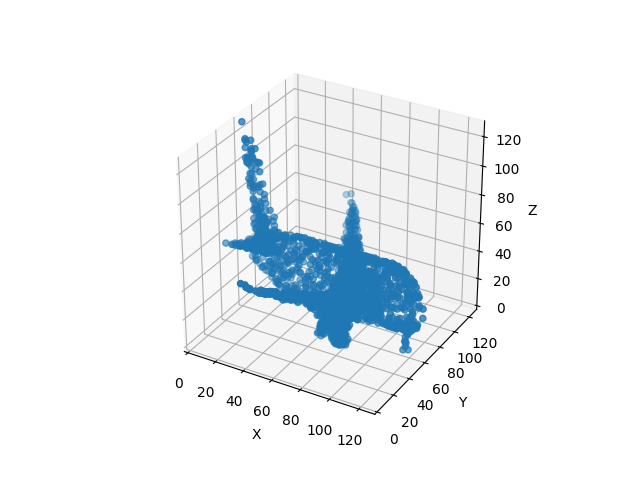

tensor(2022)
torch.Size([1, 32, 32, 32])
tensor(998)


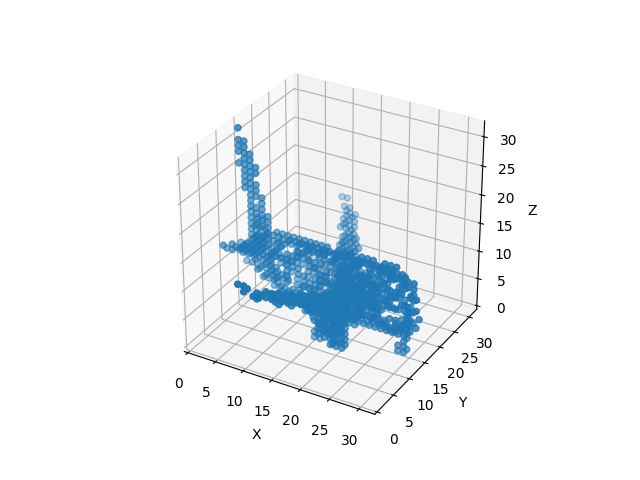

torch.Size([1, 1, 128, 128, 128])
tensor(57749)


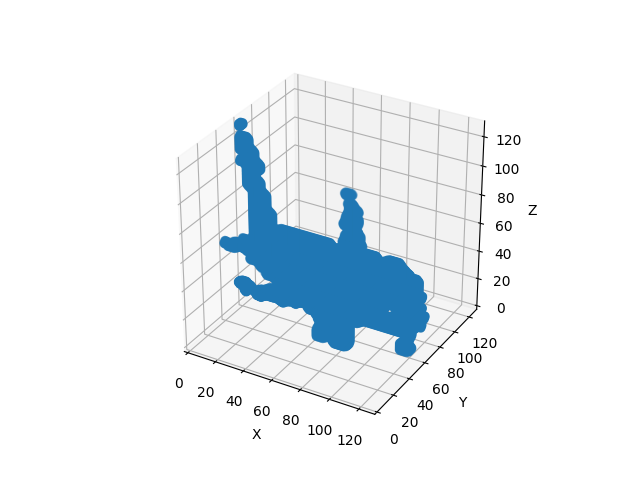

In [4]:
from models.voxel_processor import VoxelProcessor
x = torch.from_numpy(voxels[0]).unsqueeze(dim=0)
print(x.shape)
x_img = visualize_voxel(x.squeeze().numpy())
display(x_img)
vp = VoxelProcessor(input_size=128, target_size=32)
print(torch.sum(torch.where(x > 0.5, 1, 0)))
ds = vp.downscale(x)
print(ds.shape)
print(torch.sum(torch.where(ds > 0.5, 1, 0)))
ds_img = visualize_voxel(ds.squeeze().numpy())
display(ds_img)
us = vp.upscale(ds.unsqueeze(dim=0))
print(us.shape)
print(torch.sum(torch.where(us > 0.5, 1, 0)))
us_img = visualize_voxel(us.squeeze().numpy())
display(us_img)
